<a href="https://colab.research.google.com/github/tonyccm2/Algoritmo-de-dos-vias-circunferencias/blob/master/Segment_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Ejercicio Resuelto con Segment Tree

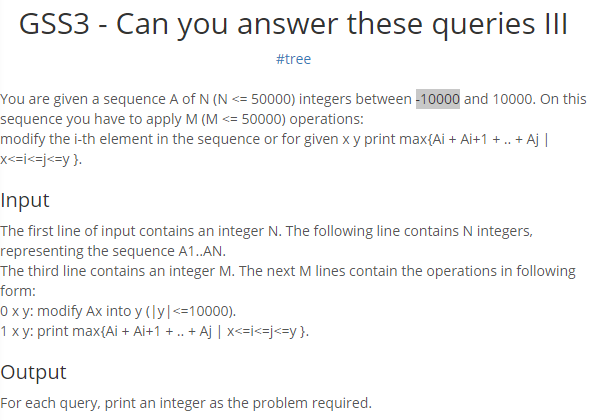

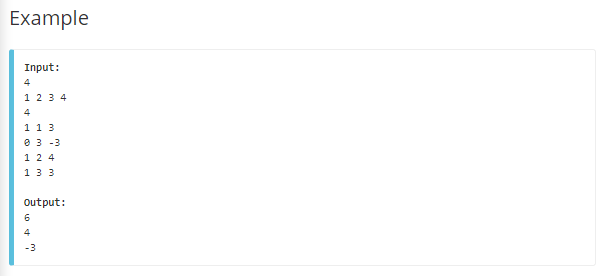

In [10]:


# funcion que crea  el vector de sumas t
def build(A,v,tl,tr):
    if(tl==tr):
        t[v] = A[tl]
    else:
        tm = (tl+tr)//2
        build(A, v*2, tl, tm)
        build(A, v*2+1, tm+1, tr)
        t[v] = t[v*2] + t[v*2 + 1]

# función que suma los elementos de un arreglo desde (l >= tl >= 1 hasta r <= tr <= n-1)
def sum_q(v,tl,tr,l,r):
    if (l>r):
        return 0
    if (l == tl and r == tr):
        return t[v];
    tm = (tl+tr)//2
    return sum_q(v*2, tl ,tm ,l ,min(r,tm)) + sum_q(v*2+1, tm+1 ,tr ,max(l, tm+1) ,r)

# función que actualiza un valor del arreglo, manteniendo el arreglo (arbol) t  de sumas actualizado
def update_val(v,tl,tr,pos,new_val):
    if(tl == tr):
        t[v] = new_val
    else:
        tm = (tl+tr)//2
        if (pos <= tm):
            update_val(v*2, tl, tm, pos, new_val)
        else:
            update_val(v*2+1, tm+1, tr, pos, new_val)
        t[v] = t[v*2] + t[v*2+1]

def max_inter(l,r):
  maximo = -10000
  for i in range(l,r+1):
    for j in range(i,r+1):
      val = sum_q(1,0,n-1,i,j)
      maximo = max(maximo,val)
  return maximo

#ejercicio
#leer N
n = int(input())
#crear tamaño de arbol 
t = [0]*4*n
#leer arreglo
A = input()
A=A.split(" ")
A= [int(x) for x in A]
#construir arbol
build(A,1,0,n-1)
#leer M
m = int(input())
for i in range(0,m):
  #leer M veces las operaciones
  linea = input()
  linea = linea.split(" ")
  linea= [int(x) for x in linea]
  if(linea[0]==0):
    update_val(1,0,n-1,linea[1]-1,linea[2]) 
  if(linea[0]==1):
    maximo = max_inter(linea[1]-1,linea[2]-1)
    print(maximo)


4
1 2 3 4
4
1 1 3
6
0 3 -3
1 2 4
4
1 3 3
-3
